In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
traindf = load_data(r"D:\Học\DAP/project/train.csv")
testdf = load_data(r"D:\Học\DAP/project/test.csv")
featuresdf = load_data(r"D:\Học\DAP/project/features.csv")
storesdf = load_data(r"D:\Học\DAP/project/stores.csv")



Shape: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
252742,26,46,2011-07-29,11167.97,False
341223,36,8,2011-10-21,3210.50,False
54951,6,48,2012-01-27,1040.00,False
133933,14,46,2012-09-14,23074.93,False
48380,5,95,2010-08-13,20988.73,False
187081,19,97,2011-07-01,26566.66,False
240919,25,29,2012-01-27,3078.96,False
312529,32,85,2011-11-25,2234.47,True
40324,5,4,2012-02-10,10180.97,True
23582,3,23,2012-06-29,16098.26,False


Shape: (115064, 4)


,Store,Dept,Date,IsHoliday
1088,1,30,2012-11-23,True
70998,27,28,2013-01-11,False
63151,24,36,2013-05-10,False
35249,14,10,2012-12-21,False
56086,21,83,2013-04-26,False
32588,13,14,2013-05-03,False
62046,24,7,2013-01-11,False
21037,8,83,2013-06-14,False
24406,10,14,2012-12-07,False
52287,20,33,2013-03-08,False


Shape: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1864,11,2010-12-10,53.33,2.843,NaN,NaN,NaN,NaN,NaN,214.769304,7.564,False
174,1,2013-06-07,76.44,3.439,3514.75,742.59,116.15,1015.44,5137.09,NaN,NaN,False
3753,21,2012-04-06,69.02,3.891,14207.85,NaN,6.99,3662.26,1615.27,221.073764,6.891,False
4185,23,2013-07-26,66.54,3.879,150.46,1764.66,191.56,5.92,493.85,NaN,NaN,False
2671,15,2012-06-15,67.70,3.786,3453.42,478.60,0.01,404.11,3862.90,138.129533,8.150,False
46,1,2010-12-24,52.33,2.886,NaN,NaN,NaN,NaN,NaN,211.405122,7.838,False
5370,30,2011-11-11,59.80,3.297,42.28,276.94,14.54,NaN,3508.88,217.645539,7.441,False
1877,11,2011-03-11,63.29,3.459,NaN,NaN,NaN,NaN,NaN,217.465368,7.551,False
6148,34,2012-10-26,57.95,3.514,1151.88,68.01,3.00,392.12,1468.81,131.193097,8.839,False
2399,14,2010-09-24,68.59,2.713,NaN,NaN,NaN,NaN,NaN,182.669674,8.743,False


Shape: (45, 3)


,Store,Type,Size
43,44,C,39910
19,20,A,203742
39,40,A,155083
11,12,B,112238
21,22,B,119557
30,31,A,203750
7,8,A,155078
33,34,A,158114
20,21,B,140167
36,37,C,39910


# DATA PREPARATION & ANALYSIS

In [5]:
traindf1=traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left')
traindf1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [6]:
traindf2=traindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)


In [7]:
traindf2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

*check any outliers on sales values*

In [8]:
traindf2.loc[traindf2['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,both,B,118221


In [9]:
traindf3=traindf2.loc[traindf2['Weekly_Sales']>0]
traindf4=traindf3.drop(['_merge'],axis=1)

In [10]:
traindf4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


In [11]:
traindf4['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

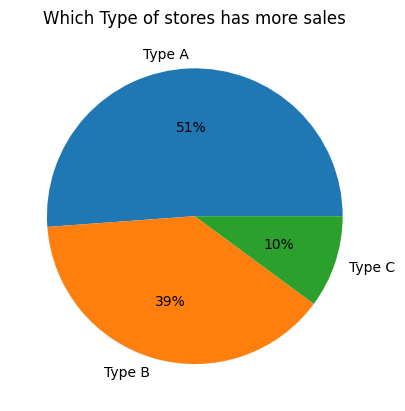

In [12]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
stores = ['Type A','Type B','Type C']

data = traindf4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

In [13]:
traindf4['year'] = pd.DatetimeIndex(traindf4['Date']).year #Separating year data.

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\1416507921.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   

              Fuel_Price       CPI  Unemployment      Size      year  
Store           0.065321 -0.211261      0.208759 -0.182763  0.002831  
Dept            0.003544 -0.007178      0.0

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\1416507921.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


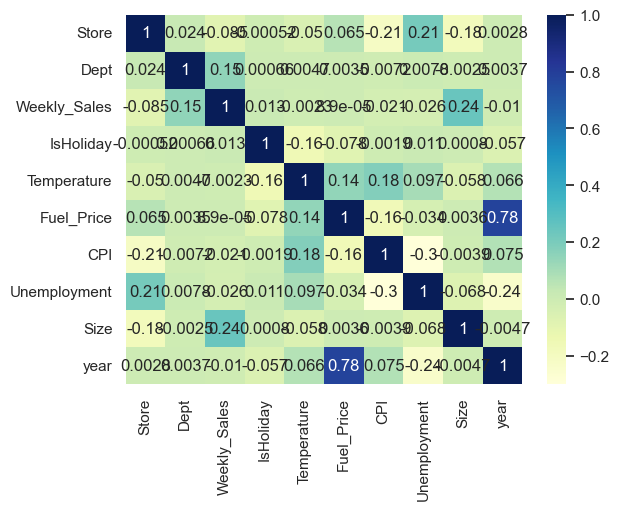

In [14]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = traindf4

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()


In [15]:
print(traindf4.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int64
dtype: object


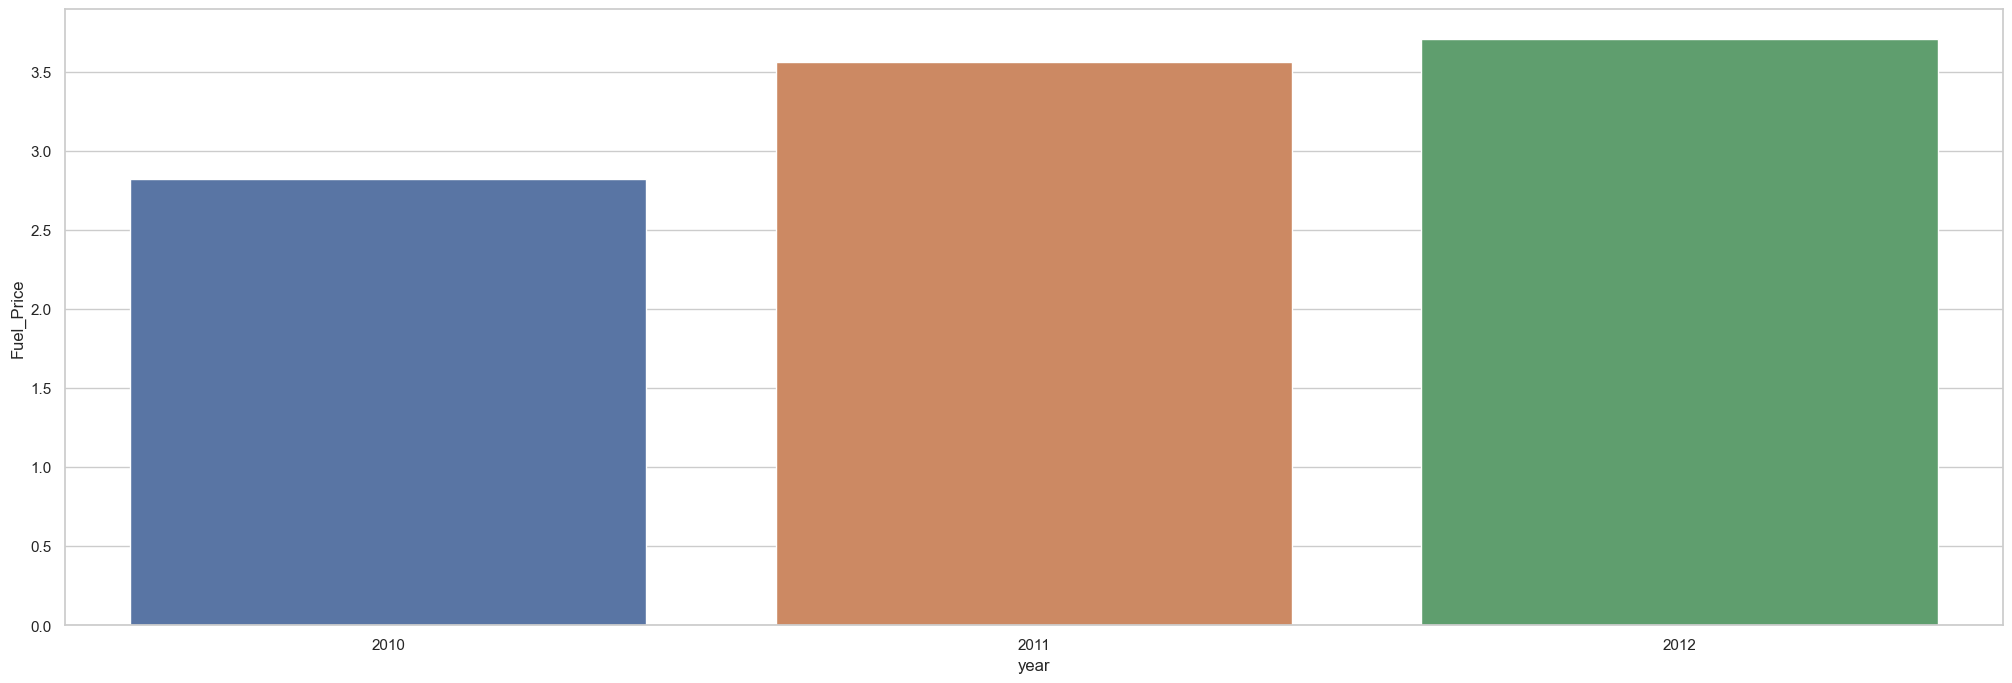

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips =traindf4
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

**Weekly sales vs Store**

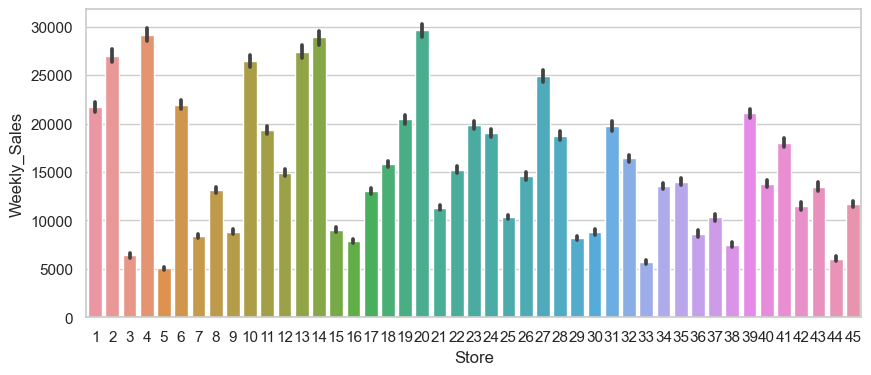

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

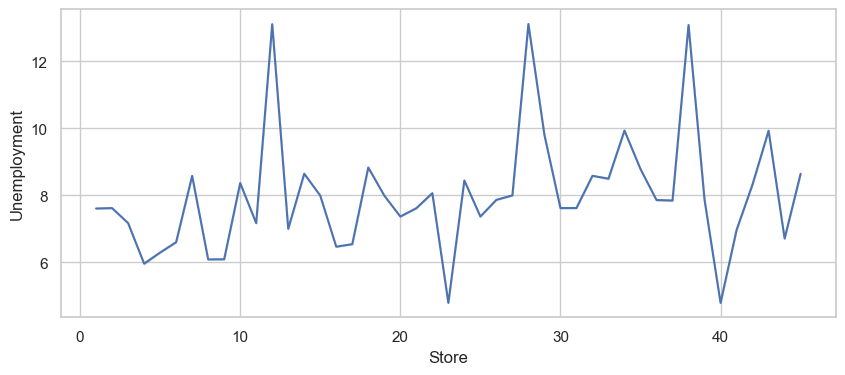

In [19]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = traindf4

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()


In [20]:
traindf4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012


In [21]:
traindf4['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

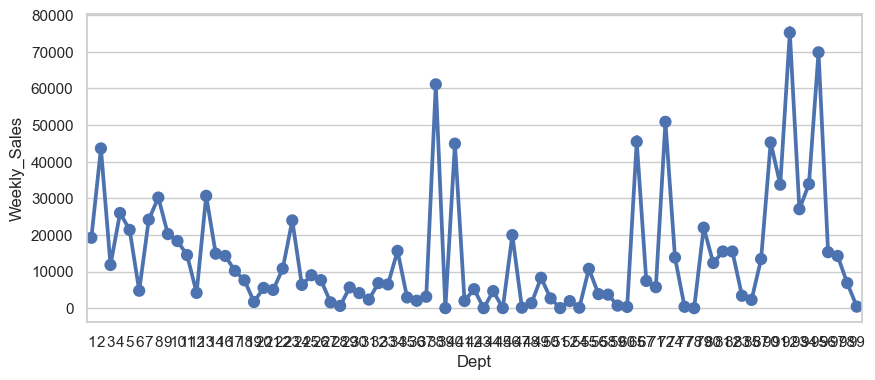

In [22]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data =traindf4

# draw pointplot
sns.pointplot(x ='Dept',
			y = "Weekly_Sales",
			data = data)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()


In [23]:
traindf4['month'] = pd.DatetimeIndex(traindf4['Date']).month #extract month data

In [24]:
traindf4['week'] = pd.DatetimeIndex(traindf4['Date']).week #extract week data

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2593830182.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  traindf4['week'] = pd.DatetimeIndex(traindf4['Date']).week #extract week data


In [25]:
traindf5=traindf4.drop(['Date'],axis=1)

<AxesSubplot: xlabel='month'>

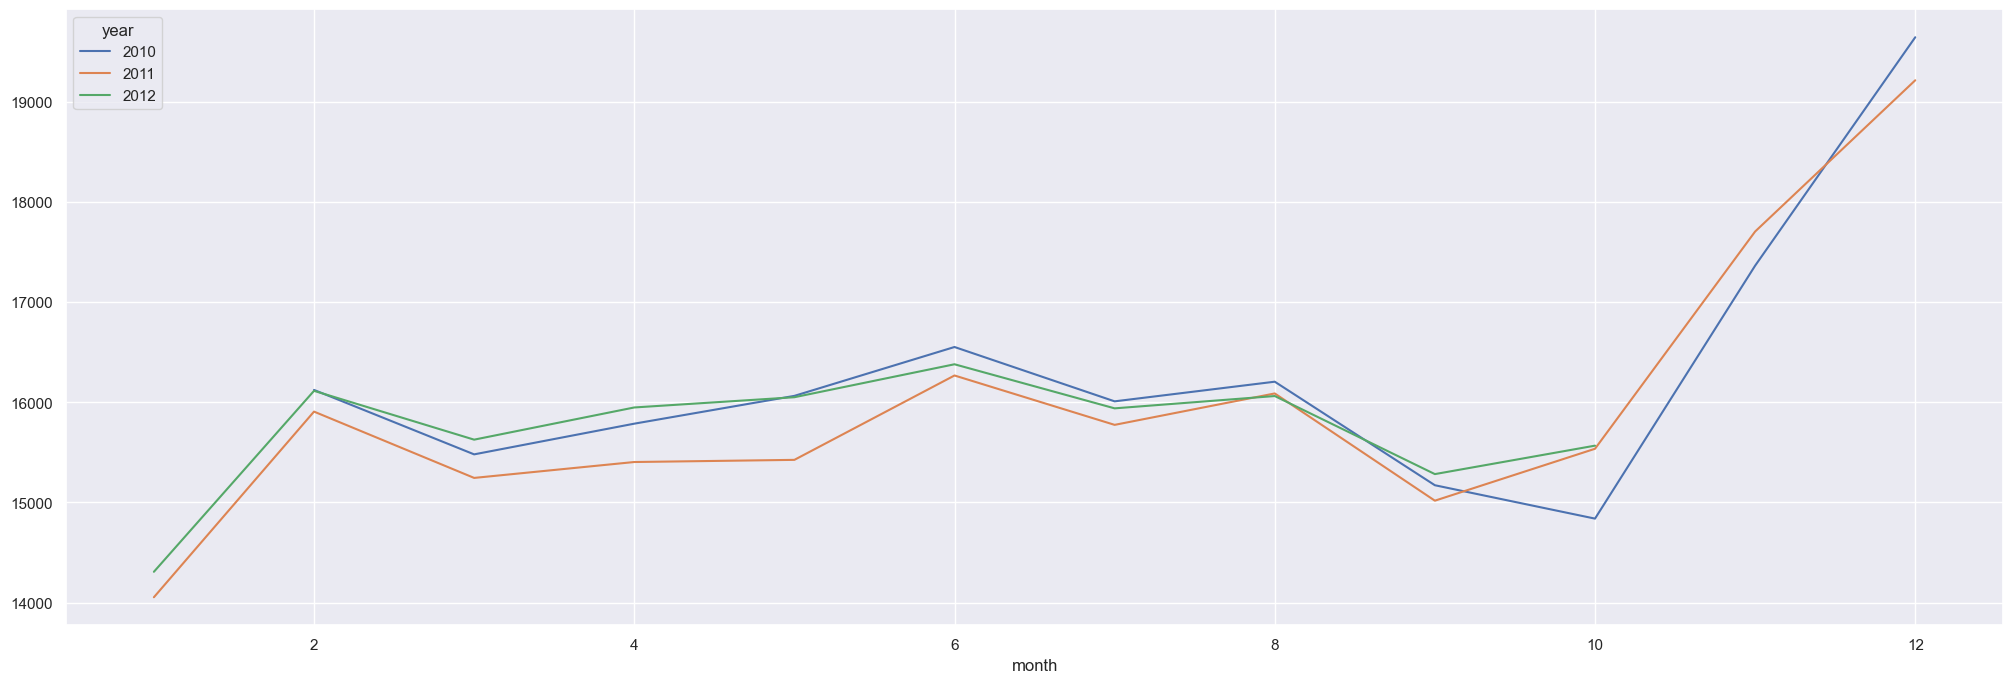

In [26]:
month_wise_sales = pd.pivot_table(traindf5, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

**Label encoding for Holiday column and Type**

In [28]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
traindf5['IsHoliday']= label_encoder.fit_transform(traindf5['IsHoliday'])
traindf5['Type']= label_encoder.fit_transform(traindf5['Type'])

traindf5


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


**Correlation Map 2**

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Type          0.226352  0.003157     -0.182229  -0.001000     0.043035   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   
month         0.000907  0.000800      0.028401   0.123058     0.235957   
week          0.000926  0.000767      

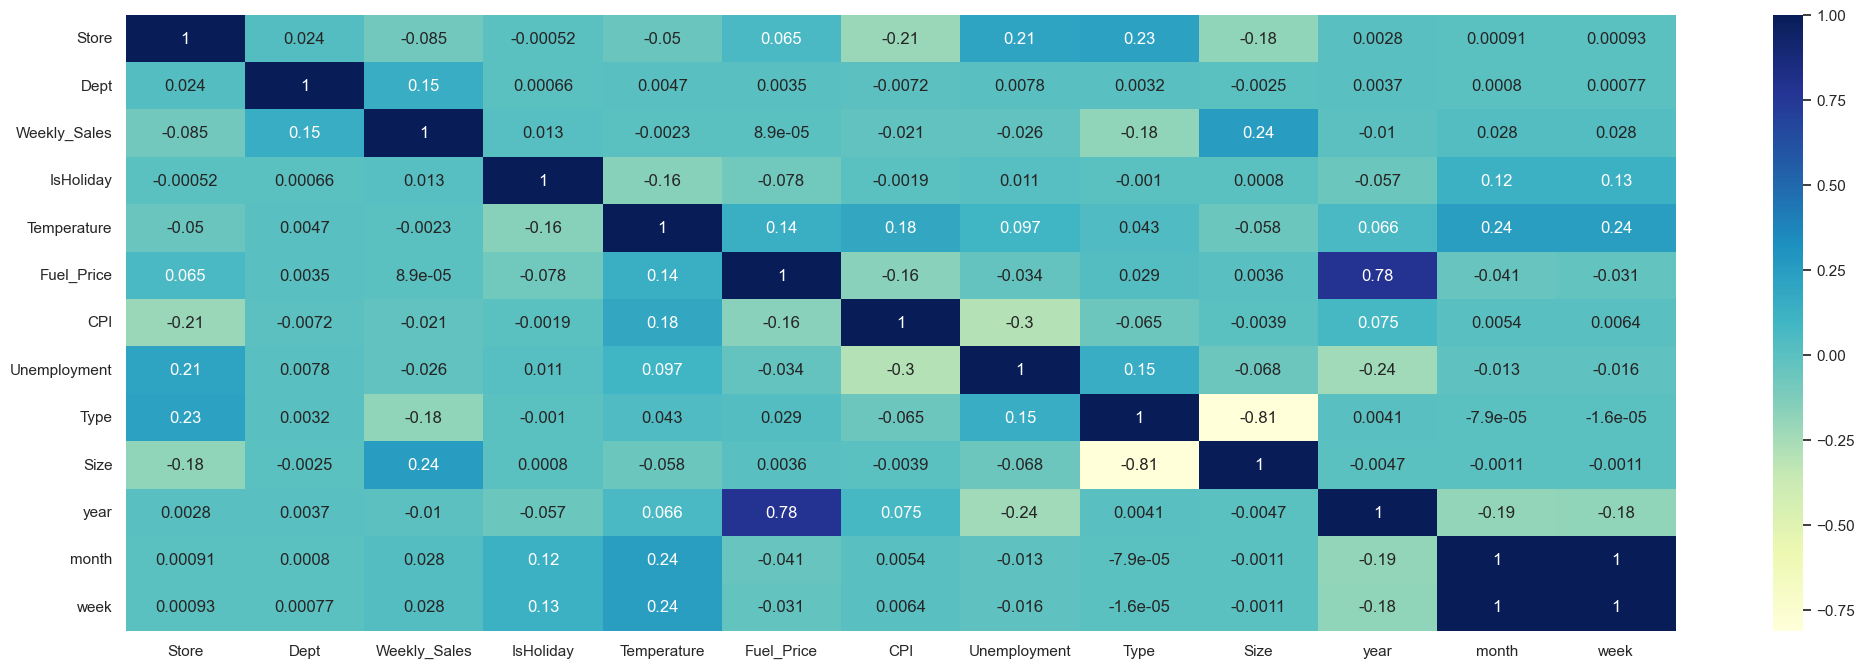

In [29]:
data = traindf5

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()


In [30]:
traindf5

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


In [32]:
traindf5.to_csv('D:\data_clean.csv', index=False)


